# Neural Network for inpainting pixels in an image using tensorflow 1

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as mg
from data_generators import gen_frm_pic
from util_functions import util_functions

INDEX_TRGT = 12
INDEX_END = 24
ROW_SHAPE = (1,25)

Instructions for updating:
non-resource variables are not supported in the long term


## Generate images data

images/auto_coder_data/train/wild/pixabay_wild_001089.jpg
images/auto_coder_data/train/wild/pixabay_wild_000589.jpg


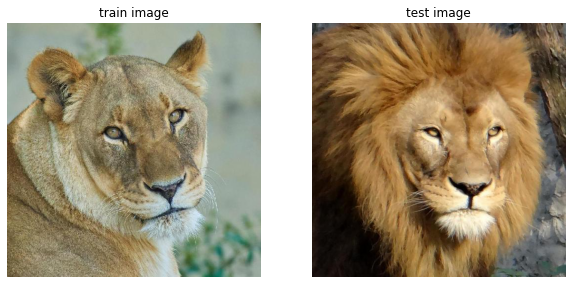

In [2]:
WILD_IMAGES_DIR = 'images/auto_coder_data/train/wild'

random_image_name1 = gen_frm_pic.get_random_image(WILD_IMAGES_DIR)
random_image_name1_image_path = WILD_IMAGES_DIR + '/' + random_image_name1

random_image_name2 = gen_frm_pic.get_random_image(WILD_IMAGES_DIR)
random_image_name2_image_path = WILD_IMAGES_DIR + '/' + random_image_name2

random_image1 = plt.imread(random_image_name1_image_path)
random_image2 = plt.imread(random_image_name2_image_path)

rows = 1
colls = 2
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(rows,colls,1)
plt.imshow(random_image1)
plt.axis('off')
plt.title("Train image")

fig.add_subplot(rows,colls,2)
plt.imshow(random_image2)
plt.axis('off')
plt.title("Test image")

data, data_test = gen_frm_pic.generate_wild_image(random_image_name1_image_path, random_image_name2_image_path)

## Split each pixel data to RGB channels

In [4]:
# red channel data
r_data = []

# green channel data
g_data = []

# blue channel data
b_data = []

for image in data:
    
    r_temp=[]
    b_temp=[]
    g_temp=[]
    for i in range(5):
        for j in range(5):
            r_temp.append(image[i][j][0])
            b_temp.append(image[i][j][1])
            g_temp.append(image[i][j][2])
    r_array=np.asarray(r_temp)
    g_array=np.asarray(r_temp)
    b_array=np.asarray(r_temp)
    util_functions.swap(r_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(g_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(b_array,INDEX_TRGT,INDEX_END)
    r_data.append(r_array)
    g_data.append(g_array)
    b_data.append(b_array)
    
r_test = []
g_test = []
b_test = []

for image in data_test:
    
    r_temp=[]
    b_temp=[]
    g_temp=[]
    for i in range(5):
        for j in range(5):
            r_temp.append(image[i][j][0])
            g_temp.append(image[i][j][1])
            b_temp.append(image[i][j][2])
    r_array=np.asarray(r_temp)
    g_array=np.asarray(g_temp)
    b_array=np.asarray(b_temp)
    util_functions.swap(r_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(g_array,INDEX_TRGT,INDEX_END)
    util_functions.swap(b_array,INDEX_TRGT,INDEX_END)
    r_test.append(r_array)
    g_test.append(g_array)
    b_test.append(b_array)
    
data = [r_data, g_data, b_data]
test = [r_test, g_test, b_test]

## Split data to train, test and vailation data

In [5]:
x_train_r = []
y_train_r = []

x_test_r = []
x_test_g = []
x_test_b = []

y_test_r = []
y_test_g = []
y_test_b = []

for i in range(len(r_data)):
    x_train_r.append(r_data[i][0:INDEX_END].tolist())
    y_train_r.append([r_data[i][INDEX_END]])

for i in range(len(r_test)):
    
    x_test_r.append(r_test[i][0:INDEX_END].tolist())
    x_test_g.append(g_test[i][0:INDEX_END].tolist())
    x_test_b.append(b_test[i][0:INDEX_END].tolist())

    y_test_r.append([r_test[i][INDEX_END]])
    y_test_g.append([g_test[i][INDEX_END]])
    y_test_b.append([b_test[i][INDEX_END]])


x_testers = [x_test_r,x_test_g,x_test_b]
y_testers = [y_test_r,y_test_g,y_test_b]

## Model

In [6]:
features = 24 # each pixel
hidden_layer_nodes = 16
loss_plot = []
test_plot = []
x = tf.placeholder(tf.float32, [None, features])
y_ = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.truncated_normal([features, hidden_layer_nodes]))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_nodes]))
z1 = tf.add(tf.matmul(x,W1),b1)
a1 = tf.nn.relu(z1) # using relu function
W2 = tf.Variable(tf.truncated_normal([hidden_layer_nodes,1]))
b2 = tf.Variable(0.)
z2 = tf.matmul(a1,W2) + b2
st_w = []
nd_w = []

loss = tf.reduce_mean(tf.pow(z2 - y_, 2))
update = tf.train.AdamOptimizer(0.001).minimize(loss) # using adam optimizer

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(0,10000):
        sess.run(update, feed_dict = {x:x_train_r, y_:y_train_r})
        st_w.append(sess.run(W1))
        nd_w.append(sess.run(W2))

In [7]:
print(np.sqrt(loss.eval(session=sess, feed_dict = {x:x_train_r, y_:y_train_r})))

5.6757526


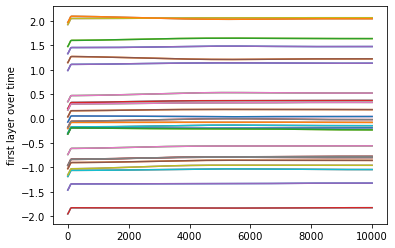

In [9]:
d = np.array(np.array(st_w).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('first layer over time')
plt.plot(d)

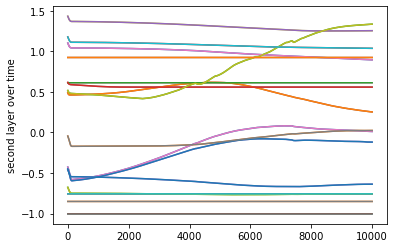

In [11]:
d = np.array(np.array(nd_w).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('second layer over time')
plt.plot(d)

In [12]:
print("sqaured test error on the red channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[0], y_:y_testers[0]})))
print("sqaured test error on the green channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[1], y_:y_testers[1]})))
print("sqaured test error on the blue channel:", np.sqrt(loss.eval(session=sess, feed_dict = {x:x_testers[2], y_:y_testers[2]})))

sqaured test error on the red channel: 15.884879
sqaured test error on the green channel: 21.415977
sqaured test error on the blue channel: 27.598637


In [13]:
arr_r = np.asarray(x_testers[0])
arr_g =  np.asarray(x_testers[1])
arr_b =  np.asarray(x_testers[2])
p_r = sess.run(tf.nn.relu(z2),feed_dict={x:arr_r})
p_g = sess.run(tf.nn.relu(z2),feed_dict={x:arr_g})
p_b = sess.run(tf.nn.relu(z2),feed_dict={x:arr_b})

In [14]:
matrices = []
for i in range(len(arr_r)):
    temp_r = arr_r[i].tolist()
    temp_g = arr_g[i].tolist()
    temp_b = arr_b[i].tolist()
    temp_r.append(int(p_r[i][0]))
    temp_g.append(int(p_g[i][0]))
    temp_b.append(int(p_b[i][0]))
    util_functions.swap(temp_r,INDEX_TRGT,INDEX_END)
    util_functions.swap(temp_g,INDEX_TRGT,INDEX_END)
    util_functions.swap(temp_b,INDEX_TRGT,INDEX_END)
    k = 0
    mat = []
    for j in range(0,5):
        matrice = []
        for m in range(0,5):
            pixel = [temp_r[k],temp_g[k],temp_b[k]]
            k+=1
            matrice.append(pixel)
        mat.append(matrice)
    matrix = np.asarray(mat, dtype=np.uint8)
    matrices.append(matrix)

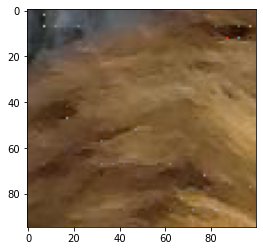

In [44]:
data = matrices
i = 0
lines = []

for _ in range(1, 20):
    concat = data[i]
    i += 1
    for _ in range(1,20):
        temp = data[i]
        concat = np.concatenate((concat, temp), axis=1)
        i += 1
    lines.append(concat)

concat = lines[0]

for i in range(1, len(lines)):
    concat = np.concatenate((concat, lines[i]), axis=0)

im = mg.fromarray(concat,'RGB')
plt.imshow(im)